<a href="https://colab.research.google.com/github/ravi-prakash1907/Data-Structures-and-Algo/blob/main/Submissions/Term%20Exams/Mid_Term1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mid-Term 1** (DSA)



## **Question A**

_"Ramu wants to store 1 million images, 2 million audio files, and 1 billion documents in a structured way in his computer. His computer has no limitations on memory nor processor speed. His computer usually achieves processing frequency beyond 1 billion hertz, and uses 50 billion tera bytes of RAM. The hard drive capacity is infinite, with average use of 500 trillion tera bytes. Size of his computer is less than the size of human brain. What is the best data structure for Ramu to store the files, and how can he efficiently store and retrieve the files at the highest possible speeds. Give your answer with explanations including relevant python codes."_  **(3 marks)**  

### **Solution:**

#### Scattered

In [ ]:
import sys
from datetime import datetime

## for formatted output in python-notebook
from IPython.display import clear_output

In [ ]:
class maxHeap:
    def __init__(self, maxsize = 100):
        self.maxsize = maxsize 
        self.size = 0
        self.Heap = [0] * (self.maxsize + 1) 
        self.data = [''] * (self.maxsize + 1) 
        self.Heap[0] = sys.maxsize 
        self.FRONT = 1
  
    def parent(self, pos):           
        return pos // 2
  
    def leftChild(self, pos):           
        return 2 * pos 
  
    def rightChild(self, pos):           
        return (2 * pos) + 1
  
    def isLeaf(self, pos):           
        if pos >= (self.size//2) and pos <= self.size: 
            return True
        return False
  
    def swap(self, fpos, spos):           
        self.Heap[fpos], self.Heap[spos] = (self.Heap[spos],  
                                            self.Heap[fpos]) 
        self.data[fpos], self.data[spos] = (self.data[spos],  
                                            self.data[fpos]) 
  
    def maxHeapify(self, pos):   
        if not self.isLeaf(pos): 
            if (self.Heap[pos] < self.Heap[self.leftChild(pos)] or
                self.Heap[pos] < self.Heap[self.rightChild(pos)]): 
  
                if (self.Heap[self.leftChild(pos)] >  
                    self.Heap[self.rightChild(pos)]): 
                    self.swap(pos, self.leftChild(pos)) 
                    self.maxHeapify(self.leftChild(pos)) 
  
                else: 
                    self.swap(pos, self.rightChild(pos)) 
                    self.maxHeapify(self.rightChild(pos)) 
  
    def insert(self, key, data):           
        if self.size >= self.maxsize: 
            self.size += 100
            stretchKey = [0] * (100) 
            stretchData = [''] * (100) 
            self.Heap.extend(stretchKey)   
            self.data.extend(stretchData) 

        self.size += 1
        self.Heap[self.size] = key
        self.data[self.size] = data 
  
        current = self.size 
  
        while (self.Heap[current] >  
               self.Heap[self.parent(current)]): 
            self.swap(current, self.parent(current)) 
            current = self.parent(current) 
    

    def listDatewise(self,pos = 1):
      currentList = leftList = rightList = []

      if self.Heap[self.leftChild(pos)] > 0:        
        leftList = self.listDatewise(self.leftChild(pos))
      if self.Heap[self.rightChild(pos)] > 0:
        rightList = self.listDatewise(self.rightChild(pos))

      currentList.extend(leftList)
      currentList.extend(rightList)
      currentList.append(pos)
      currentList.sort()

      return currentList

    def getDate(self,date):
      date = str(date)
      year = date[:4]
      month = date[4:6]
      day = date[6:8]
      date = "{}/{}/{}".format(day,month,year)
      return date


    # Function to print the data-parts of the heap 
    def PrintData(self):
      listToPop = self.listDatewise()
      
      while len(listToPop) != 0:
        print(self.data[listToPop.pop()])

    def PrintDataOld(self):         
        if self.size == 0:
          return False  
        for i in range(1, (self.size // 2) + 1): 
            print(str(self.data[i])) 
            print(str(self.data[2 * i]))
            if self.data[2 * i + 1] != '':
              print(str(self.data[2 * i + 1])) 
        return True
    
    def searchFile(self, filename, pos = 1):
      flag = False
      if self.size >= pos:
        if self.data[pos] == filename:
          flag = True
          thisDate = self.getDate(self.Heap[pos])
          print("'{}' was saved on {}".format(filename, thisDate))
        if not flag:
          flag = self.searchFile(filename,self.leftChild(pos))
        if not flag:
          flag = self.searchFile(filename,self.rightChild(pos))        
      return flag
    
    def searchDatewise(self, date, pos = 1):
      flag = False
      gotList = []

      if self.size >= pos:
        if self.Heap[pos]//1000000 == date:
          gotList.append(self.data[pos])
        leftList = self.searchDatewise(date,self.leftChild(pos))
        if leftList:
          gotList.extend(leftList)
        rightList = self.searchDatewise(date,self.rightChild(pos))      
        if rightList:
          gotList.extend(rightList)
      
      return gotList
      
  
    def extractMax(self): 
        popped = self.Heap[self.FRONT] 
        self.Heap[self.FRONT] = self.Heap[self.size] 
        self.size -= 1
        self.maxHeapify(self.FRONT) 
          
        return popped 
  


In [ ]:
###  for saperate heaps of jpg png...
class maxHeapHolder:
  def __init__(self):
    self.data = {}
  
  def __addChild(self, key):
    self.data[key] = maxHeap()
  
  def getMaxHeap(self, name):
    if name not in list(self.data.keys()):
      self.__addChild(name)
    return self.data[name]
  
  def getHeapList(self):
    return self.data

#####################
#####################


class mainNode:
  def __init__(self, data = None):
    self.data = data
    self.left = None
    self.right = None

class internalNode:
  def __init__(self, name = None):
    self.name = name
    self.children = maxHeapHolder()
  
  def getMaxHeap(self, name):
    return self.children.getMaxHeap(name)
  
  def getHeapList(self):
    return self.children.getHeapList()



In [ ]:
#####################
#####################

class mainTree:
  def __init__(self):
    self.tree = mainNode()  
    self.tree.left = internalNode('Documents')  
    self.tree.right = mainNode('Media') 
    self.tree.right.left = internalNode('Images')
    self.tree.right.right = internalNode('Audio')

    self.doc = []
    self.img = []
    self.audio = []

  #################################
  def getDocTree(self):
    return self.tree.left
  def getMediaTree(self):
      return self.tree.right
  def getImgTree(self):
      return self.tree.right.left
  def getAudioTree(self):
      return self.tree.right.right
  #################################

  #################################
  def heapHolderName(self, fName):
    nameList = fName.split('.')
    return nameList[1]
  #################################

  #################################
  def getDocHeap(self, fName):
    extention = self.heapHolderName(fName)
    self.doc.append(extention)
    doc = self.getDocTree()
    fileHeap = doc.getMaxHeap(extention)
    return fileHeap

  def getImgHeap(self, fName):
    extention = self.heapHolderName(fName)
    self.img.append(extention)
    img = self.getImgTree()
    fileHeap = img.getMaxHeap(extention)
    return fileHeap
  
  def getAudioHeap(self, fName):
    extention = self.heapHolderName(fName)
    self.audio.append(extention)
    audio = self.getAudioTree()
    fileHeap = audio.getMaxHeap(extention)
    return fileHeap

  def getHeapList(self, type):
    thisList = []

    if type == 'doc':
      doc = self.getDocTree()
      thisList = doc.getHeapList()
    if type == 'img':
      img = self.getImgTree()
      thisList = img.getHeapList()
    if type == 'audio':
      audio = self.getAudioTree()
      thisList = audio.getHeapList()
    
    return thisList
    
  #################################

  
  def printDoc(self):
    docList = self.getHeapList('doc')
    for k in list(docList.keys()):
      docList[k].PrintData()
  
  def printImg(self):
    imgList = self.getHeapList('img')
    for k in list(imgList.keys()):
      imgList[k].PrintData()
  
  def printAudio(self):
    audioList = self.getHeapList('audio')
    for k in list(audioList.keys()):
      audioList[k].PrintData()

  def searchByDate(self, date):
    tempDate = date.split('/')
    tempDate.reverse()
    tempDate = ''.join(tempDate)
    key = int(tempDate)
    
    gotList = []

    docList = self.getHeapList('doc')
    print(key)
    for k in self.doc:
      gotFiles = docList[k].searchDatewise(key)
      if gotFiles:
        gotList.extend(gotFiles)
        
    imgList = self.getHeapList('img')
    for k in self.img:
      gotFiles = imgList[k].searchDatewise(key)
      if gotFiles:
        gotList.extend(gotFiles)
    
    audioList = self.getHeapList('doc')
    for k in self.audio:
      gotFiles = audioList[k].searchDatewise(key)
      if gotFiles:
        gotList.extend(gotFiles)    

    return gotList

  #################################
  
  def addData(self):
    print("1) Add a Document\n2) Add an Image\n3) Add an Audio\n")
    ch = input("\nYour choise: ")

    if ch == '1':
      fName = input("Enter filename: ")
      heap = self.getDocHeap(fName)
    elif ch == '2':
      fName = input("Enter filename: ")
      heap = self.getImgHeap(fName)
    elif ch == '3':
      fName = input("Enter filename: ")
      heap = self.getAudioHeap(fName)
    else:
      print("Invalid input!")
      return False

    now = datetime.now()
    key = int(now.strftime("%Y%m%d%H%M%S")) # uniqueTime
  
    heap.insert(key, fName)
    return True
  
  def viewFile(self):
    print("1) View Documents\n2) View Images\n3) View Audio\n\n** Any other key to view all!\n")
    ch = input("\nYour choise: ")

    if ch == '1':
      self.printDoc()
    elif ch == '2':
      self.printImg()
    elif ch == '3':
      self.printAudio()
    else:
      self.printDoc()
      self.printImg()
      self.printAudio()

  def searchFile(self):
    print("1) Search by Name\n2) Search by Date")
    ch = input("Your choise: ")
    searchFlag = False

    if ch == '1':
      thisFile = input("Enter filename: ")
      ext = self.heapHolderName(thisFile)

      if ext in self.doc:
        docList = self.getHeapList('doc')
        searchFlag= docList[ext].searchFile(thisFile)
      elif ext in self.img:
        imgList = self.getHeapList('img')
        searchFlag = imgList[ext].searchFile(thisFile)
      elif ext in self.audio:
        audioList = self.getHeapList('audio')
        searchFlag = audioList[ext].searchFile(thisFile)
    
    elif ch == '2':
      thisDate = input("Enter the date (dd/mm/yyyy): ")
      gotList = self.searchByDate(thisDate)
      if gotList:
        print("\nFiles saved on",thisDate,":\n")
        for files in gotList:
          print(files)
        searchFlag = True
      else:
        searchFlag = False
    
        
    if not searchFlag:
      print("File does not exist!!")
    return searchFlag


#####################



In [ ]:
def menu():
  print("""
         Main-Menu
        -----------\n
        1) Add New File
        2) List Files
        3) Search or Open File(s)

        ** Any other key to exit!
        """)
  return input("\nEnter your choice: ")

In [ ]:
if __name__ == '__main__':
  thisMainTree = mainTree()

  while True:
    clear_output()  
    now = datetime.now()
    ch = menu()
    
    ## Decision
    if ch == '1':
      clear_output(wait=True)
      thisMainTree.addData()
      input("\nPress Enter!!") 

    elif ch == '2':
      clear_output(wait=True)
      thisMainTree.viewFile()
      input("\nPress Enter!!") 

    elif ch =='3':
      clear_output(wait=True)
      thisMainTree.searchFile()
      input("\nPress Enter!!") 

    else:      
      clear_output(wait=True)
      print("Good Bye!")
      break



Good Bye!


#### Complete in one block

In [ ]:
import sys
from datetime import datetime
from IPython.display import clear_output

##----------------------------------------------------##



class maxHeap:
    def __init__(self, maxsize = 100):
        self.maxsize = maxsize 
        self.size = 0
        self.Heap = [0] * (self.maxsize + 1) 
        self.data = [''] * (self.maxsize + 1) 
        self.Heap[0] = sys.maxsize 
        self.FRONT = 1
  
    def parent(self, pos):           
        return pos // 2
  
    def leftChild(self, pos):           
        return 2 * pos 
  
    def rightChild(self, pos):           
        return (2 * pos) + 1
  
    def isLeaf(self, pos):           
        if pos >= (self.size//2) and pos <= self.size: 
            return True
        return False
  
    def swap(self, fpos, spos):           
        self.Heap[fpos], self.Heap[spos] = (self.Heap[spos],  
                                            self.Heap[fpos]) 
        self.data[fpos], self.data[spos] = (self.data[spos],  
                                            self.data[fpos]) 
  
    def maxHeapify(self, pos):   
        if not self.isLeaf(pos): 
            if (self.Heap[pos] < self.Heap[self.leftChild(pos)] or
                self.Heap[pos] < self.Heap[self.rightChild(pos)]): 
  
                if (self.Heap[self.leftChild(pos)] >  
                    self.Heap[self.rightChild(pos)]): 
                    self.swap(pos, self.leftChild(pos)) 
                    self.maxHeapify(self.leftChild(pos)) 
  
                else: 
                    self.swap(pos, self.rightChild(pos)) 
                    self.maxHeapify(self.rightChild(pos)) 
  
    def insert(self, key, data):           
        if self.size >= self.maxsize: 
            self.size += 100
            stretchKey = [0] * (100) 
            stretchData = [''] * (100) 
            self.Heap.extend(stretchKey)   
            self.data.extend(stretchData) 

        self.size += 1
        self.Heap[self.size] = key
        self.data[self.size] = data 
  
        current = self.size 
  
        while (self.Heap[current] >  
               self.Heap[self.parent(current)]): 
            self.swap(current, self.parent(current)) 
            current = self.parent(current) 
    

    def listDatewise(self,pos = 1):
      currentList = leftList = rightList = []

      if self.Heap[self.leftChild(pos)] > 0:        
        leftList = self.listDatewise(self.leftChild(pos))
      if self.Heap[self.rightChild(pos)] > 0:
        rightList = self.listDatewise(self.rightChild(pos))

      currentList.extend(leftList)
      currentList.extend(rightList)
      currentList.append(pos)
      currentList.sort()

      return currentList

    def getDate(self,date):
      date = str(date)
      year = date[:4]
      month = date[4:6]
      day = date[6:8]
      date = "{}/{}/{}".format(day,month,year)
      return date


    # Function to print the data-parts of the heap 
    def PrintData(self):
      listToPop = self.listDatewise()
      
      while len(listToPop) != 0:
        print(self.data[listToPop.pop()])

    def PrintDataOld(self):         
        if self.size == 0:
          return False  
        for i in range(1, (self.size // 2) + 1): 
            print(str(self.data[i])) 
            print(str(self.data[2 * i]))
            if self.data[2 * i + 1] != '':
              print(str(self.data[2 * i + 1])) 
        return True
    
    def searchFile(self, filename, pos = 1):
      flag = False
      if self.size >= pos:
        if self.data[pos] == filename:
          flag = True
          thisDate = self.getDate(self.Heap[pos])
          print("'{}' was saved on {}".format(filename, thisDate))
        if not flag:
          flag = self.searchFile(filename,self.leftChild(pos))
        if not flag:
          flag = self.searchFile(filename,self.rightChild(pos))        
      return flag
    
    def searchDatewise(self, date, pos = 1):
      flag = False
      gotList = []

      if self.size >= pos:
        if self.Heap[pos]//1000000 == date:
          gotList.append(self.data[pos])
        leftList = self.searchDatewise(date,self.leftChild(pos))
        if leftList:
          gotList.extend(leftList)
        rightList = self.searchDatewise(date,self.rightChild(pos))      
        if rightList:
          gotList.extend(rightList)
      
      return gotList
      
  
    def extractMax(self): 
        popped = self.Heap[self.FRONT] 
        self.Heap[self.FRONT] = self.Heap[self.size] 
        self.size -= 1
        self.maxHeapify(self.FRONT) 
          
        return popped 
  

##----------------------------------------------------##



###  for saperate heaps of jpg png...
class maxHeapHolder:
  def __init__(self):
    self.data = {}
  
  def __addChild(self, key):
    self.data[key] = maxHeap()
  
  def getMaxHeap(self, name):
    if name not in list(self.data.keys()):
      self.__addChild(name)
    return self.data[name]
  
  def getHeapList(self):
    return self.data

###
###

class mainNode:
  def __init__(self, data = None):
    self.data = data
    self.left = None
    self.right = None

class internalNode:
  def __init__(self, name = None):
    self.name = name
    self.children = maxHeapHolder()
  
  def getMaxHeap(self, name):
    return self.children.getMaxHeap(name)
  
  def getHeapList(self):
    return self.children.getHeapList()


##----------------------------------------------------##


class mainTree:
  def __init__(self):
    self.tree = mainNode()  
    self.tree.left = internalNode('Documents')  
    self.tree.right = mainNode('Media') 
    self.tree.right.left = internalNode('Images')
    self.tree.right.right = internalNode('Audio')

    self.doc = []
    self.img = []
    self.audio = []

  ####
  def getDocTree(self):
    return self.tree.left
  def getMediaTree(self):
      return self.tree.right
  def getImgTree(self):
      return self.tree.right.left
  def getAudioTree(self):
      return self.tree.right.right
  ####

  ####
  def heapHolderName(self, fName):
    nameList = fName.split('.')
    return nameList[1]
  ####

  ####
  def getDocHeap(self, fName):
    extention = self.heapHolderName(fName)
    self.doc.append(extention)
    doc = self.getDocTree()
    fileHeap = doc.getMaxHeap(extention)
    return fileHeap

  def getImgHeap(self, fName):
    extention = self.heapHolderName(fName)
    self.img.append(extention)
    img = self.getImgTree()
    fileHeap = img.getMaxHeap(extention)
    return fileHeap
  
  def getAudioHeap(self, fName):
    extention = self.heapHolderName(fName)
    self.audio.append(extention)
    audio = self.getAudioTree()
    fileHeap = audio.getMaxHeap(extention)
    return fileHeap

  def getHeapList(self, type):
    thisList = []

    if type == 'doc':
      doc = self.getDocTree()
      thisList = doc.getHeapList()
    if type == 'img':
      img = self.getImgTree()
      thisList = img.getHeapList()
    if type == 'audio':
      audio = self.getAudioTree()
      thisList = audio.getHeapList()
    
    return thisList
    
  ####

  
  def printDoc(self):
    docList = self.getHeapList('doc')
    for k in list(docList.keys()):
      docList[k].PrintData()
  
  def printImg(self):
    imgList = self.getHeapList('img')
    for k in list(imgList.keys()):
      imgList[k].PrintData()
  
  def printAudio(self):
    audioList = self.getHeapList('audio')
    for k in list(audioList.keys()):
      audioList[k].PrintData()

  def searchByDate(self, date):
    tempDate = date.split('/')
    tempDate.reverse()
    tempDate = ''.join(tempDate)
    key = int(tempDate)
    
    gotList = []

    docList = self.getHeapList('doc')
    print(key)
    for k in self.doc:
      gotFiles = docList[k].searchDatewise(key)
      if gotFiles:
        gotList.extend(gotFiles)
        
    imgList = self.getHeapList('img')
    for k in self.img:
      gotFiles = imgList[k].searchDatewise(key)
      if gotFiles:
        gotList.extend(gotFiles)
    
    audioList = self.getHeapList('doc')
    for k in self.audio:
      gotFiles = audioList[k].searchDatewise(key)
      if gotFiles:
        gotList.extend(gotFiles)    

    return gotList

  #####
  
  def addData(self):
    print("1) Add a Document\n2) Add an Image\n3) Add an Audio\n")
    ch = input("\nYour choise: ")

    if ch == '1':
      fName = input("Enter filename: ")
      heap = self.getDocHeap(fName)
    elif ch == '2':
      fName = input("Enter filename: ")
      heap = self.getImgHeap(fName)
    elif ch == '3':
      fName = input("Enter filename: ")
      heap = self.getAudioHeap(fName)
    else:
      print("Invalid input!")
      return False

    now = datetime.now()
    key = int(now.strftime("%Y%m%d%H%M%S")) # uniqueTime
  
    heap.insert(key, fName)
    return True
  
  def viewFile(self):
    print("1) View Documents\n2) View Images\n3) View Audio\n\n** Any other key to view all!\n")
    ch = input("\nYour choise: ")

    if ch == '1':
      self.printDoc()
    elif ch == '2':
      self.printImg()
    elif ch == '3':
      self.printAudio()
    else:
      self.printDoc()
      self.printImg()
      self.printAudio()

  def searchFile(self):
    print("1) Search by Name\n2) Search by Date")
    ch = input("Your choise: ")
    searchFlag = False

    if ch == '1':
      thisFile = input("Enter filename: ")
      ext = self.heapHolderName(thisFile)

      if ext in self.doc:
        docList = self.getHeapList('doc')
        searchFlag= docList[ext].searchFile(thisFile)
      elif ext in self.img:
        imgList = self.getHeapList('img')
        searchFlag = imgList[ext].searchFile(thisFile)
      elif ext in self.audio:
        audioList = self.getHeapList('audio')
        searchFlag = audioList[ext].searchFile(thisFile)
    
    elif ch == '2':
      thisDate = input("Enter the date (dd/mm/yyyy): ")
      gotList = self.searchByDate(thisDate)
      if gotList:
        print("\nFiles saved on",thisDate,":\n")
        for files in gotList:
          print(files)
        searchFlag = True
      else:
        searchFlag = False
    
        
    if not searchFlag:
      print("File does not exist!!")
    return searchFlag

##----------------------------------------------------##


def menu():
  print("""
         Main-Menu
        -----------\n
        1) Add New File
        2) List Files
        3) Search or Open File(s)

        ** Any other key to exit!
        """)
  return input("\nEnter your choice: ")


##----------------------------------------------------##


if __name__ == '__main__':
  thisMainTree = mainTree()

  while True:
    clear_output()  
    now = datetime.now()
    ch = menu()
    
    ## Decision
    if ch == '1':
      clear_output(wait=True)
      thisMainTree.addData()
      input("\nPress Enter!!") 

    elif ch == '2':
      clear_output(wait=True)
      thisMainTree.viewFile()
      input("\nPress Enter!!") 

    elif ch =='3':
      clear_output(wait=True)
      thisMainTree.searchFile()
      input("\nPress Enter!!") 

    else:      
      clear_output(wait=True)
      print("Good Bye!")
      break




## **Question B**

_"Write a python program making use of any data structures to automatically detect, identify, rearrange and correct the words in jumbled sentences."_  
Such as:  
- _ORF _ MECO FEEFOC_  
- _effect ew ni did uchm sales last ton eary pimrovement
eunron si oodg_  

_Explain your solution in detail._ **(3 marks)**  

### **Solution:**

In [ ]:
#!apt install enchant
#!pip install PyEnchant
import enchant

#########################
#       Trie Node       #
#########################
class TrieNode:
    def __init__(self): 
        self.children = [None]*26  
        # isEndOfWord = True signifies end of the word 
        self.isEndOfWord = False

###################
#       Trie      #
###################
class Trie: 
    def __init__(self): 
        self.root = self.getNode() 
  
    def getNode(self): 
        return TrieNode() 
  
    def __charToIndex(self,ch):          
        return ord(ch)-ord('a') 
  
    ################################
    
    ## insert new word in trie
    def insert(self,key):
        traverse = self.root 
        length = len(key) 
        for level in range(length): 
            index = self.__charToIndex(key[level])
            if not traverse.children[index]: 
                traverse.children[index] = self.getNode() 
            traverse = traverse.children[index] 
  
        traverse.isEndOfWord = True
    ## search a word in trie
    def search(self, key):
        traverse = self.root 
        length = len(key) 
        for level in range(length): 
            index = self.__charToIndex(key[level]) 
            if not traverse.children[index]: 
                return False
            traverse = traverse.children[index] 
  
        return traverse != None and traverse.isEndOfWord 
 

################################
#  Word-Permutation generator  #
################################
def wordPermutation(front, last=''):
  finalList = []
  if len(front) == 0: 
    finalList.append(last)
  else:
    for index in range(len(front)):
      finalList.extend(wordPermutation(front[0:index]+front[index+1:],last+front[index]))

  return finalList


################################
#  Main Class for Correction   #
################################
def correctSen(sentence):
  thisTrie = Trie()
  myDict = enchant.Dict("en_US")

  wList = sentence.split(" ")
  for index in range(len(wList)):
    word = wList[index]
    if thisTrie.search(word):
      continue
    else:
      tmpWord = list(word)[1:]
      tmpWord.sort()
      tmpWord = word[0]+''.join(tmpWord)
      permList = wordPermutation(tmpWord)
      permList.remove(word)
      for pWord in permList:
        if thisTrie.search(pWord):
          break
        elif myDict.check(pWord):
          thisTrie.insert(pWord)
          wList[index] = pWord
          break
  
  finalSentence = " ".join(wList)
  return finalSentence


################################
#       Driver Function        #
################################
if __name__ == '__main__':
  while True:
    print("\nHit enter without any input to get exit!")
    sen = input("Enter a sentence with jumbled words: ")
    if sen is '':
      break
    else:
      print("After spell-correction: ",correctSen(sen))


Hit enter without any input to get exit!
Enter a sentence with jumbled words: wism blarme llihs
After spell-correction:  swim blamer hills

Hit enter without any input to get exit!
Enter a sentence with jumbled words: 


## **Question C**

_"Capture a photo of your neighborhood, and label each of the objects. Create a tree structure with each node representing an object and link weights showing the similarity between them. What will be best way to implement this? Which data structure will you use and why? Show with an example code, providing detailed explanations of the pros and cons of your approach."_ **(4 marks)**   

### **Solution:**

In [ ]:
from PIL import Image
import imageio
import matplotlib.pyplot as plt


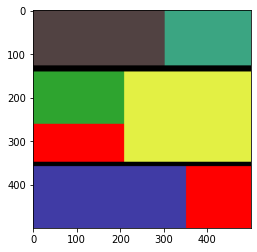

In [ ]:
pic = imageio.imread('test.png')

plt.imshow(pic)

In [ ]:
print('Type of the image : ' , type(pic))
print()
print('Shape of the image : {}'.format(pic.shape))
print('Image Hight {}'.format(pic.shape[0]))
print('Image Width {}'.format(pic.shape[1]))
print('Dimension of Image {}'.format(pic.ndim))

Type of the image :  <class 'imageio.core.util.Array'>

Shape of the image : (500, 500, 3)
Image Hight 500
Image Width 500
Dimension of Image 3


In [ ]:
rPxls = gPxls = bPxls = []
rows = pic.shape[0]    # pic[row,col]
cols = pic.shape[1]

for row in range(rows):
  for col in range(cols):
    rPxls.append(pic[row,col][0])
    gPxls.append(pic[row,col][1])
    bPxls.append(pic[row,col][2])

rPxls[:5] # init 5 red pixels


[81, 66, 66, 81, 66]

In [ ]:
pic[300,10]

Array([255,   0,   0], dtype=uint8)